In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("MentalHealthSurvey.csv")

df



,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Male,22,PU,Undergraduate,Information Technology,4th year,3.0-3.5,On-Campus,No,No Sports,...,4,3,1,4,4,2,3,1,2,"Online Entertainment, Outdoor Activities, Sleep"
83,Female,22,COMSATS,Undergraduate,Software Engineering,4th year,3.5-4.0,Off-Campus,Yes,No Sports,...,5,5,5,5,1,5,5,5,5,"Religious Activities, Sleep"
84,Male,21,PU,Undergraduate,Data Science,2nd year,2.0-2.5,Off-Campus,No,No Sports,...,5,4,2,4,3,1,2,1,1,"Religious Activities, Sports and Fitness, Soci..."
85,Male,22,PU,Undergraduate,Data Science,2nd year,2.5-3.0,Off-Campus,No,No Sports,...,3,3,3,3,2,3,4,4,5,Sleep


1. How does involvement in sports correlate with levels of depression and anxiety among students?

                   depression   anxiety
sports_engagement                      
1-3 times            3.041667  3.416667
4-6 times            2.090909  2.090909
7+ times             3.400000  3.100000
No Sports            3.571429  3.428571


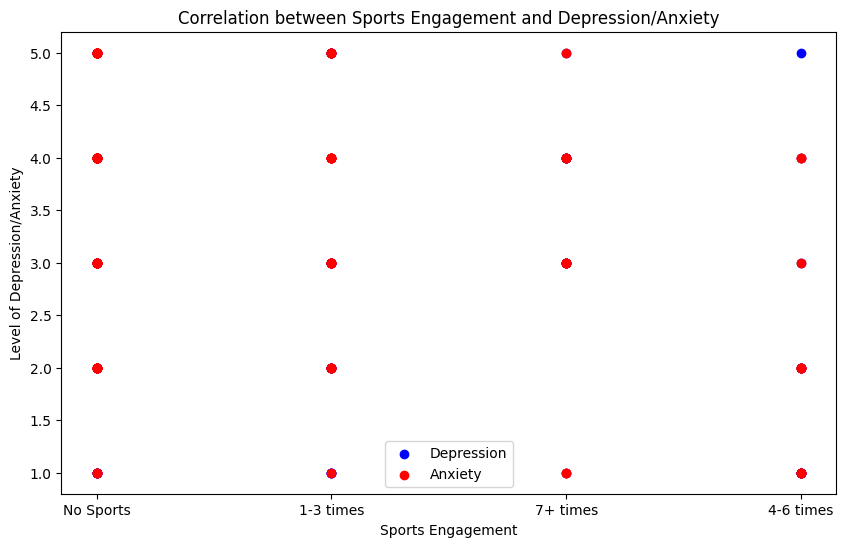

In [40]:
sports_vs_mental_health = df.groupby('sports_engagement')[['depression', 'anxiety']].mean()
print(sports_vs_mental_health)

plt.figure(figsize=(10, 6))
plt.scatter(df['sports_engagement'], df['depression'], color='blue', label='Depression')
plt.scatter(df['sports_engagement'], df['anxiety'], color='red', label='Anxiety')
plt.title('Correlation between Sports Engagement and Depression/Anxiety')
plt.xlabel('Sports Engagement')
plt.ylabel('Level of Depression/Anxiety')
plt.legend()
plt.show()


2. Does participation in sports activities affect students' academic workload and study satisfaction?

                   academic_workload   study_satisfaction
sports_engagement                                        
1-3 times                    4.208333            4.166667
4-6 times                    3.181818            4.181818
7+ times                     3.700000            3.900000
No Sports                    3.928571            3.738095


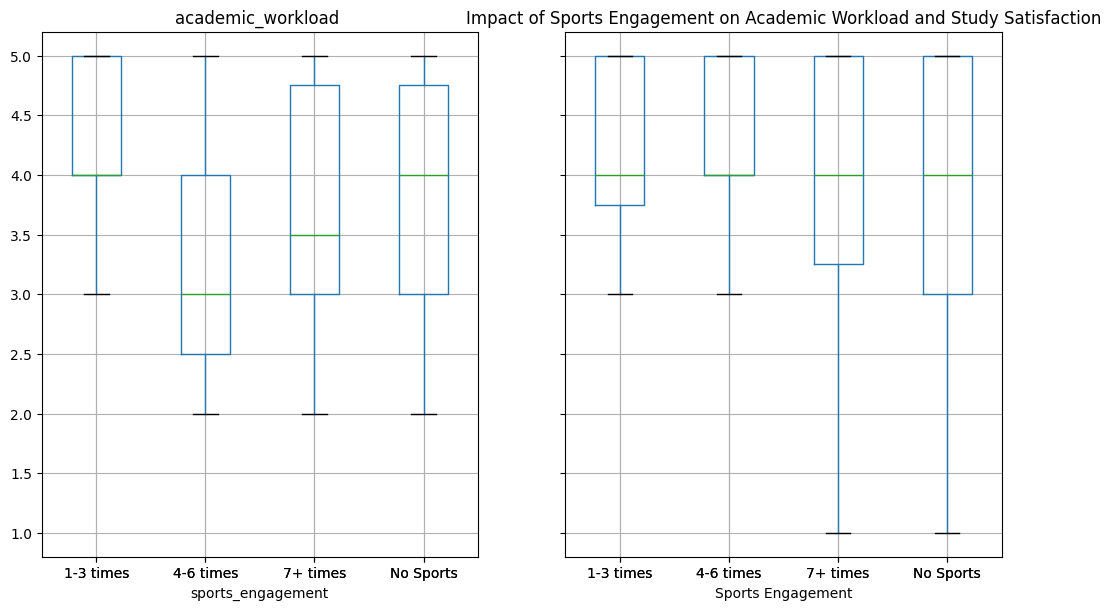

In [41]:
sports_vs_academics = df.groupby('sports_engagement')[['academic_workload ', 'study_satisfaction']].mean()
print(sports_vs_academics)

df.boxplot(column=['academic_workload ', 'study_satisfaction'], by='sports_engagement', figsize=(12, 7))
plt.suptitle('')
plt.title('Impact of Sports Engagement on Academic Workload and Study Satisfaction')
plt.xlabel('Sports Engagement')
plt.ylabel('Scores')
plt.show()

3. How does on-campus versus off-campus residential status influence students' social relationships and feelings of isolation?

                    social_relationships  isolation
residential_status                                 
Off-Campus                      2.769231   3.292308
On-Campus                       2.818182   3.090909


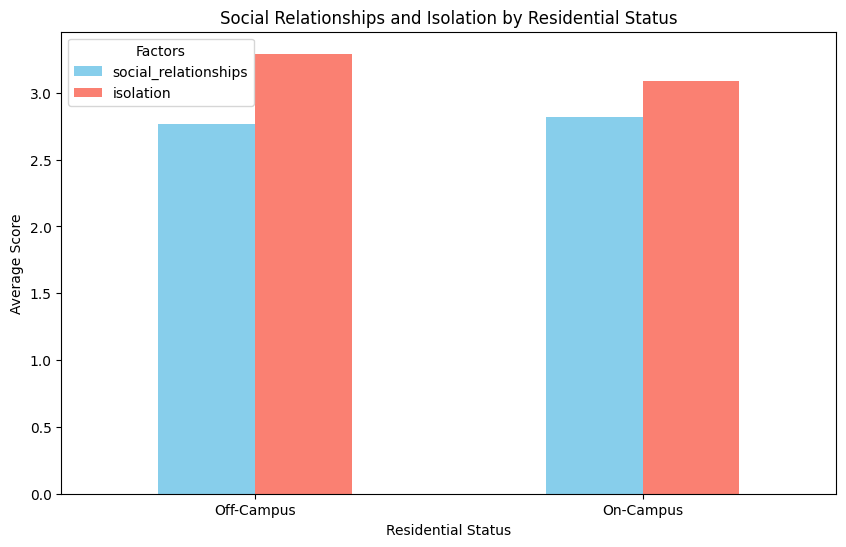

In [37]:
residential_analysis = df.groupby('residential_status')[['social_relationships', 'isolation']].mean()
print(residential_analysis)


residential_analysis.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Social Relationships and Isolation by Residential Status')
plt.ylabel('Average Score')
plt.xlabel('Residential Status')
plt.xticks(rotation=0)
plt.legend(title='Factors')
plt.show()

4. Is there a significant difference in academic pressure and study satisfaction between undergraduate and postgraduate students?

               academic_pressure  study_satisfaction
degree_level                                        
Postgraduate            4.000000            4.500000
Undergraduate           3.776471            3.917647


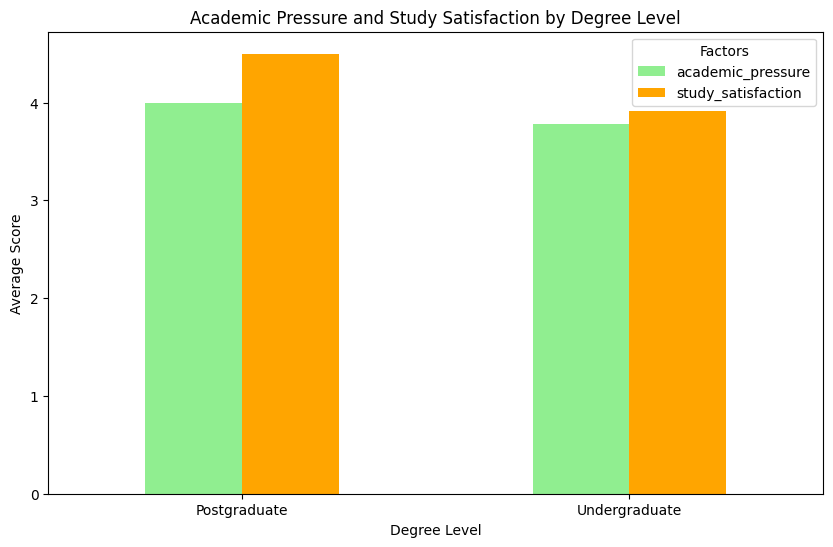

In [38]:
degree_level_analysis = df.groupby('degree_level')[['academic_pressure', 'study_satisfaction']].mean()
print(degree_level_analysis)

degree_level_analysis.plot(kind='bar', figsize=(10, 6), color=['lightgreen', 'orange'])
plt.title('Academic Pressure and Study Satisfaction by Degree Level')
plt.ylabel('Average Score')
plt.xlabel('Degree Level')
plt.xticks(rotation=0)
plt.legend(title='Factors')
plt.show()

5. Do students with higher levels of depression and anxiety report greater feelings of future insecurity?

                   depression   anxiety  future_insecurity
depression           1.000000  0.844141           0.465185
anxiety              0.844141  1.000000           0.444924
future_insecurity    0.465185  0.444924           1.000000


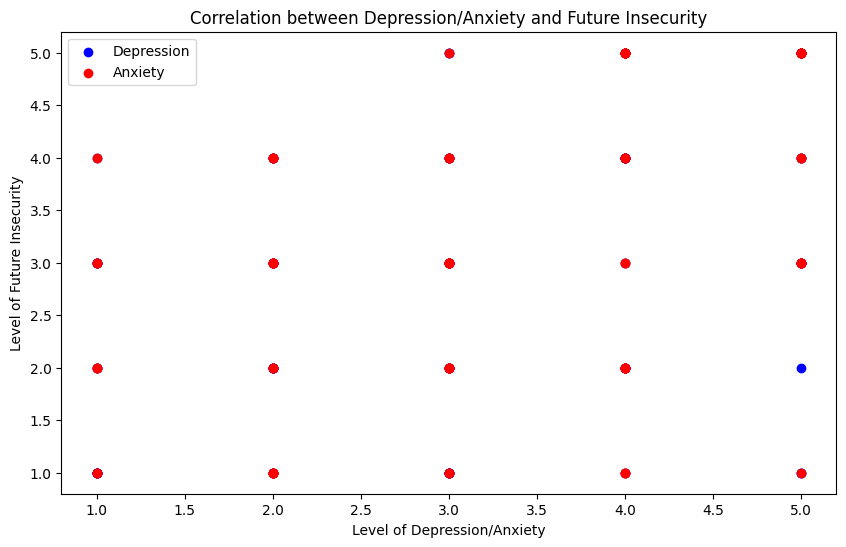

In [42]:
mental_health_vs_future_insecurity = df[['depression', 'anxiety', 'future_insecurity']].corr()
print(mental_health_vs_future_insecurity)

plt.figure(figsize=(10, 6))
plt.scatter(df['depression'], df['future_insecurity'], color='blue', label='Depression')
plt.scatter(df['anxiety'], df['future_insecurity'], color='red', label='Anxiety')
plt.title('Correlation between Depression/Anxiety and Future Insecurity')
plt.xlabel('Level of Depression/Anxiety')
plt.ylabel('Level of Future Insecurity')
plt.legend()
plt.show()

6. How do time constraints, such as those faced by student-athletes, affect study satisfaction and academic workload?

                   study_satisfaction  academic_workload 
sports_engagement                                        
1-3 times                    4.166667            4.208333
4-6 times                    4.181818            3.181818
7+ times                     3.900000            3.700000
No Sports                    3.738095            3.928571


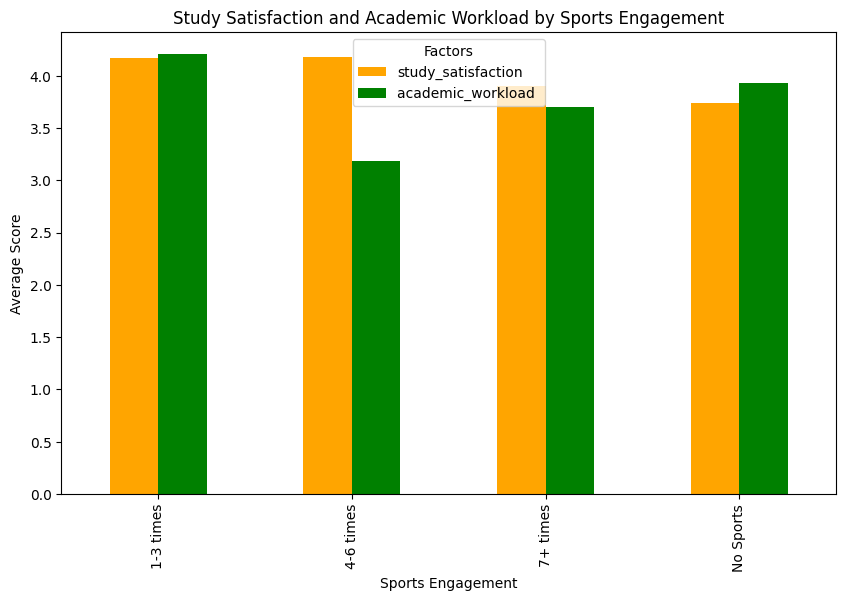

In [43]:
sports_vs_time_constraints = df.groupby('sports_engagement')[['study_satisfaction', 'academic_workload ']].mean()
print(sports_vs_time_constraints)

df.groupby('sports_engagement')[['study_satisfaction', 'academic_workload ']].mean().plot(kind='bar', figsize=(10, 6), color=['orange', 'green'])
plt.title('Study Satisfaction and Academic Workload by Sports Engagement')
plt.xlabel('Sports Engagement')
plt.ylabel('Average Score')
plt.legend(title='Factors')
plt.show()

7. How do financial concerns impact the mental health of students, particularly in terms of anxiety and depression?

                    financial_concerns  depression   anxiety
financial_concerns            1.000000    0.379851  0.278741
depression                    0.379851    1.000000  0.844141
anxiety                       0.278741    0.844141  1.000000


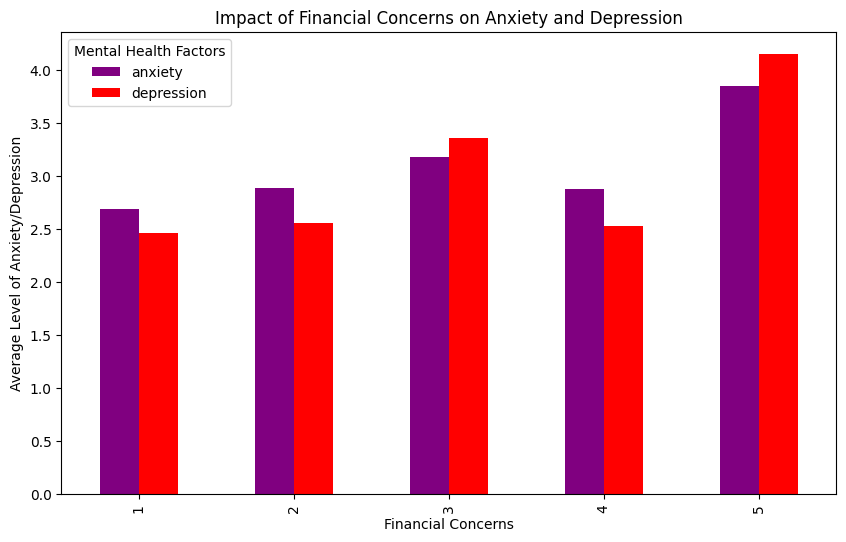

In [44]:
financial_vs_mental_health = df[['financial_concerns', 'depression', 'anxiety']].corr()
print(financial_vs_mental_health)

df.groupby('financial_concerns')[['anxiety', 'depression']].mean().plot(kind='bar', figsize=(10, 6), color=['purple', 'red'])
plt.title('Impact of Financial Concerns on Anxiety and Depression')
plt.xlabel('Financial Concerns')
plt.ylabel('Average Level of Anxiety/Depression')
plt.legend(title='Mental Health Factors')
plt.show()

8. How do different degree majors correlate with students' reported levels of academic workload and financial concerns?

                        academic_workload   financial_concerns
degree_major                                                  
Computer Science                  4.029412            3.647059
Data Science                      3.804878            3.219512
Information Technology            3.555556            2.777778
Software Engineering              4.333333            4.666667


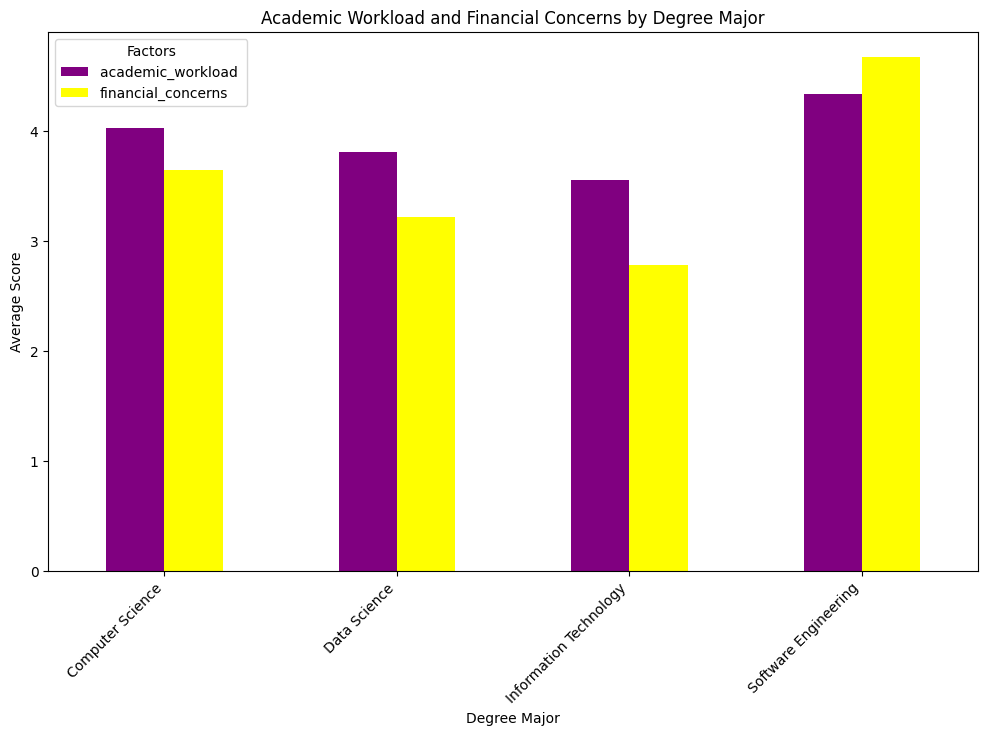

In [39]:
degree_major_analysis = df.groupby('degree_major')[['academic_workload ', 'financial_concerns']].mean()
print(degree_major_analysis)

degree_major_analysis.plot(kind='bar', figsize=(12, 7), color=['purple', 'yellow'])
plt.title('Academic Workload and Financial Concerns by Degree Major')
plt.ylabel('Average Score')
plt.xlabel('Degree Major')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Factors')
plt.show()

9. How do social relationships correlate with feelings of isolation among students?

                      social_relationships  isolation
social_relationships              1.000000  -0.558803
isolation                        -0.558803   1.000000


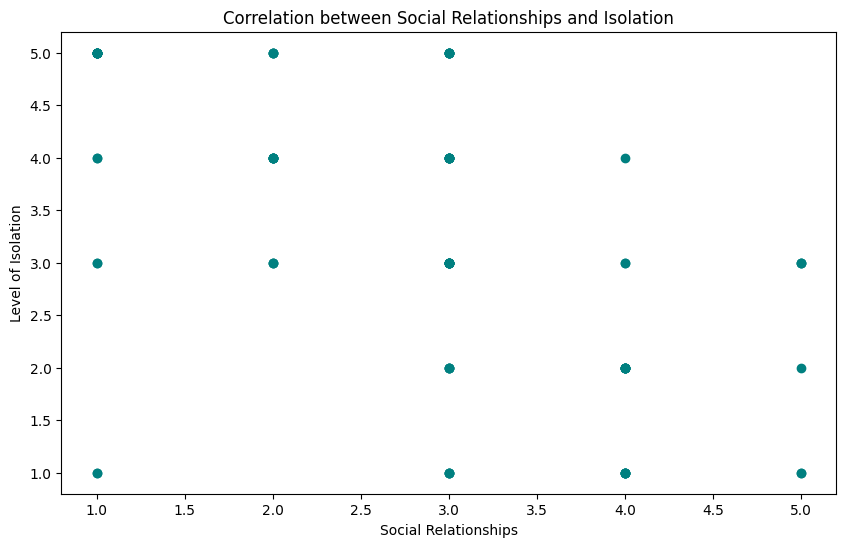

In [45]:
social_vs_isolation = df[['social_relationships', 'isolation']].corr()
print(social_vs_isolation)

plt.figure(figsize=(10, 6))
plt.scatter(df['social_relationships'], df['isolation'], color='teal')
plt.title('Correlation between Social Relationships and Isolation')
plt.xlabel('Social Relationships')
plt.ylabel('Level of Isolation')
plt.show()

10. How does age correlate with mental health factors like anxiety, depression, and isolation?

In [11]:
mental_health_df = df[['age', 'anxiety', 'depression', 'isolation']]
correlation_matrix = mental_health_df.corr()
print(correlation_matrix)


                 age   anxiety  depression  isolation
age         1.000000  0.088800    0.089504  -0.029515
anxiety     0.088800  1.000000    0.844141   0.671894
depression  0.089504  0.844141    1.000000   0.710185
isolation  -0.029515  0.671894    0.710185   1.000000
